<a href="https://colab.research.google.com/github/allansuzuki/AirbnbPT_Analisys/blob/main/%5BBR%5D_Analisando_os_Dados_do_Airbnb_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Porto (Portugal)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Porto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [4]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# importar a listagem de hospedagens (anúncios) para um DataFrame
raw = pd.read_csv('http://data.insideairbnb.com/portugal/norte/porto/2021-12-08/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

[*fonte original*](https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean)

* **id**: ID ou chave única da hospedagem;
* **name**: Nome da hospedagem;
* **host_id**: ID ou chave única do anfitrião;
* **host_name**: Nome do anfitrião;
* **neighbourhood_group**: cidades ou agrupamento de bairros;
* **neighbourhood**: bairro (ou *freguesia* em PT);
* **latitude**: coordenanda latitude;
* **longitude**: coordenanda longitude;
* **room_type**: tipo de hospedagem (local inteiro, quarto compartilhado, ...) [+info](https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean);
* **price**: diária em moeda local (*EUR*);
* **minimum_nights**: estadia mínima;
* **number_of_reviews**: # comentários da hospedagem;
* **last_review**: data do comentário mais recente da hospedagem;
* **reviews_per_month**: comentários por mês;
* **calculated_host_listings_count**: # hospedagens que o anfitrião tem na região;
* **availability_365**: disponibilidade de dias da hospedagem em um ano;
* **number_of_reviews_ltm**: # comentários nos últimos 12 meses (*last twelve months*);
* **license**: licenciamento para Alojamento Local [+info](https://www.airbnb.com.br/help/article/2038/processo-de-registro-de-portugal-perguntas-frequentes#What%20is%20the%20current%20law%20in%20Portugal%20around%20short-term%20rentals)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.16,1,113,0,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.18,3,0,0,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,148,2021-11-23,1.14,7,310,12,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,69,3,192,2021-11-27,1.65,3,347,9,634/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [7]:
# identificar o volume de dados do DataFrame
print('Qtd dados:',raw.shape[0])
print('Qtd campos:',raw.shape[1])
# verificar as 5 primeiras entradas do dataset
raw.head()

Qtd dados: 10748
Qtd campos: 18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.16,1,113,0,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.18,3,0,0,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,148,2021-11-23,1.14,7,310,12,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,69,3,192,2021-11-27,1.65,3,347,9,634/AL


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(raw.isnull().sum()/raw.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.149795
last_review                       0.149795
license                           0.082248
host_name                         0.000372
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Estamos interessados somente em campos com informações relevantes, portanto:<br>
> todos os cmapos exceto *'id' e 'host_id'*



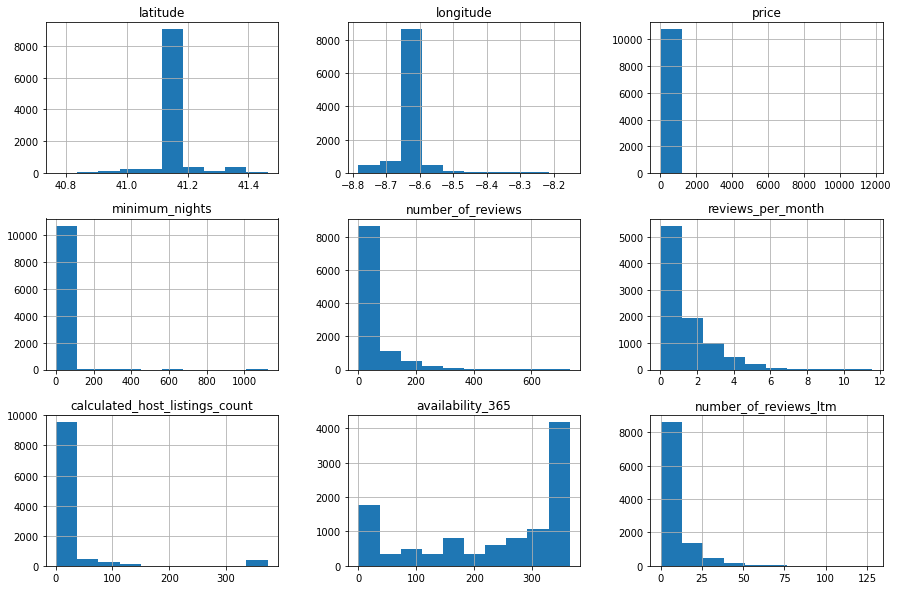

In [9]:
# plotar o histograma das variáveis numéricas
numdata = raw.columns.drop(['id','host_id'])
raw[numdata].hist(figsize=(15,10));

Percebemos que, pela latitude e longitude, pode haver uma concentração maior de hospedagens em uma mesma área (*Isto poderá se verificar num [gráfico de dispersão](1mFEBeqQFm-fQstwsdH85zn7sxH-ngIoz#scrollTo=UxVJqJ_3W59I&line=2&uniqifier=1)*). 
<br> Todos os outros campos, exceto *'availability_365'*, possuem uma concentração em um determinado valor. Percebemos que há presença de **outliers** (Ex: estadia mínima ser maior que 500 dias).<br> Outra observação é que a disponibilidade da hospedagem ou está completamente livre ou está com poucos dias.

### **Q4. Qual a média dos preços de aluguel?**

In [10]:
# ver a média da coluna `price` em moeda local (EURO)
print('Média de preços: EUR',raw['price'].mean())

Média de preços: EUR 87.53107554893934


### **Q4. Qual a correlação existente entre as variáveis**

In [11]:
# criar uma matriz de correlação
corr = raw[numdata].corr()
# mostrar a matriz de correlação
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,-0.674697,-0.023815,0.012280,-0.028135,-0.041503,-0.014261,-0.024694,-0.024864
longitude,-0.674697,1.000000,0.031202,-0.017159,0.005891,0.016723,-0.003107,0.041974,0.003675
price,-0.023815,0.031202,1.000000,0.000953,-0.005789,-0.021781,0.086260,-0.006674,-0.043127
minimum_nights,0.012280,-0.017159,0.000953,1.000000,-0.021246,-0.039665,-0.022079,-0.033169,-0.043294
number_of_reviews,-0.028135,0.005891,-0.005789,-0.021246,1.000000,0.676156,0.058442,0.018980,0.517801
reviews_per_month,-0.041503,0.016723,-0.021781,-0.039665,0.676156,1.000000,0.176408,0.111063,0.741582
calculated_host_listings_count,-0.014261,-0.003107,0.086260,-0.022079,0.058442,0.176408,1.000000,0.097190,0.209948
availability_365,-0.024694,0.041974,-0.006674,-0.033169,0.018980,0.111063,0.097190,1.000000,0.167546
number_of_reviews_ltm,-0.024864,0.003675,-0.043127,-0.043294,0.517801,0.741582,0.209948,0.167546,1.000000


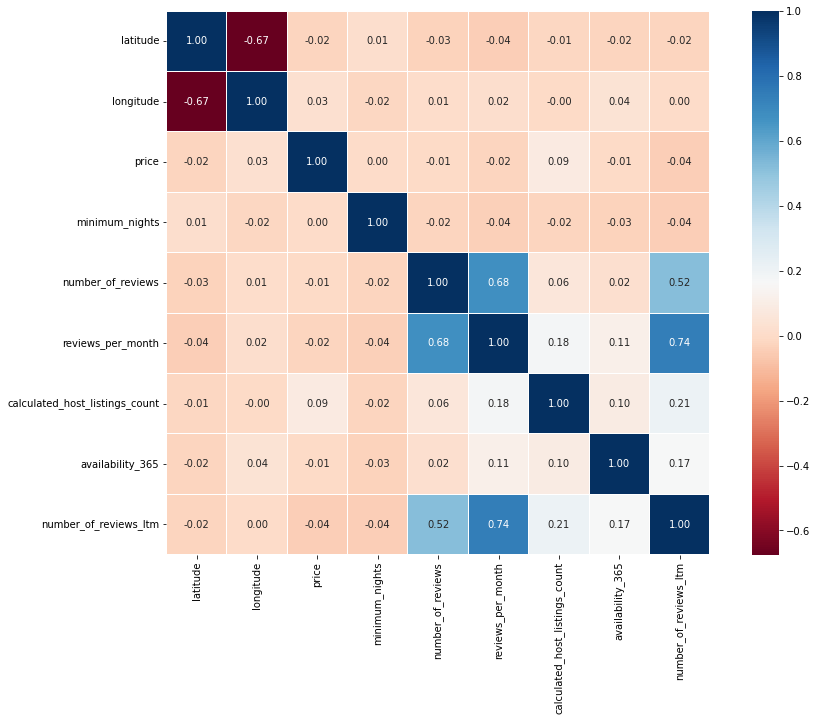

In [12]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='RdBu',annot=True,square=True,linewidths='.1',fmt='.2f');

Observa-se que há relação **forte** entre dois pares:
> latitude x longitude: eles são bem concentrados em um determinado valor, então era esperado q para uma dada longitude, a latitude correspondente seria sempre a mesma ou próxima;

> number_of_reviews x number_of_reviews_ltm: claramente se tem um número elevado de comentários por mês significa um elevado número de comentários em um ano.

Observa-se que há relação **fraca** entre outros dois pares:
> number_of_reviews x host_listing_count: Aparentemente, o anfitriao com mais de uma hospedagem tende a ter mais comentários das hospedagens. Porém, não podemos afirmar sem saber ditribuição dessa relação. [Verificaremos em outra seção](https://colab.research.google.com/drive/1mFEBeqQFm-fQstwsdH85zn7sxH-ngIoz#scrollTo=Qual_a_rela_o_entre_a);

> number_of_reviews x availability_365: Aparentemente, outra relação fraca é que quem tem mais comentários geralmente tem mais disponilibildade na hospedagem. O que faz sentido, já que mais pessoas podem se hospedar e relatar a experiência.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

#### Tipos de hospedagens
* **Entire home/apt**: local inteiro. Não há convivencia com o anfitrião ou outro hóspede.
* **Private room**: quarto inteiro. Local é compartilhado com outro(s).
* **Hotel room**: quarto em rede hoteleira.
* **Shared room**: quarto compartilhado com outro(s)

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
raw['room_type'].value_counts()

Entire home/apt    8561
Private room       1949
Hotel room          151
Shared room          87
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
raw['room_type'].value_counts() / raw.shape[0]

Entire home/apt    0.796520
Private room       0.181336
Hotel room         0.014049
Shared room        0.008095
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



#### Mapa do Distrito (ou Estado) de Porto:
<p>
  <img src="https://i.pinimg.com/originals/c7/19/02/c71902575913c9ab963bbc5c0d83c1a0.gif">
</p>


In [15]:
#ver preços por cidades, na média:
raw.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=True)


neighbourhood_group
SÃO JOÃO DA MADEIRA      47.818182
MAIA                     66.412371
VALONGO                  67.653846
MATOSINHOS               68.682432
ESPINHO                  76.992188
SANTA MARIA DA FEIRA     77.396825
OLIVEIRA DE AZEMÉIS      78.600000
PÓVOA DE VARZIM          80.066148
PORTO                    84.638637
VILA NOVA DE GAIA        89.494533
VILA DO CONDE            92.490842
PAREDES                 110.833333
SANTO TIRSO             125.677419
TROFA                   131.625000
AROUCA                  136.675676
GONDOMAR                202.758929
VALE DE CAMBRA          369.687500
Name: price, dtype: float64

In [16]:
# ver preços por bairros, na média
raw.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

neighbourhood
Gandra                                    18.333333
Pedrouços                                 25.454545
Arrifana                                  27.000000
Baguim do Monte (Rio Tinto)               27.500000
Milheirós                                 30.000000
                                           ...     
Cristelo                                 300.000000
Paços de Brandão                         350.000000
Gondomar (São Cosme), Valbom e Jovim     380.857143
Negrelos (São Tomé)                      536.000000
São Pedro de Castelões                  2140.000000
Name: price, Length: 153, dtype: float64

In [17]:
#ver preços de bairros por cidade, na média:
sorted_sum = raw[['neighbourhood','price']].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
groupPrice = sorted_sum.to_frame().merge(raw[['neighbourhood_group','neighbourhood']].drop_duplicates(),how='left',on='neighbourhood').sort_values(['neighbourhood_group','price'],ascending=[True,False])
groupPrice[['neighbourhood_group','neighbourhood','price']]

,neighbourhood_group,neighbourhood,price
6,AROUCA,São Miguel do Mato,225.666667
9,AROUCA,Tropeço,202.500000
10,AROUCA,Alvarenga,201.750000
14,AROUCA,Santa Eulália,186.000000
15,AROUCA,Fermedo,185.555556
...,...,...,...
85,VILA NOVA DE GAIA,Canidelo,89.083969
91,VILA NOVA DE GAIA,Arcozelo,83.098592
117,VILA NOVA DE GAIA,São Félix da Marinha,63.048780
124,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,58.745455


#### Latitude e longitude

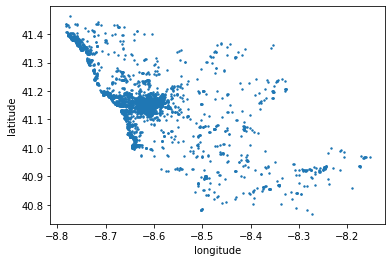

In [18]:
# plotar os imóveis pela latitude-longitude
raw[['latitude','longitude','price']].plot(kind='scatter',x='longitude',y='latitude',s=2,);

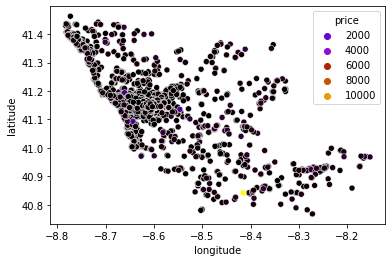

In [41]:
#Verificando o local onde há maior preço
import seaborn as sns
sns.scatterplot(data=raw,x='longitude',y='latitude',hue='price',palette='gnuplot',);

Pode-se notar que nesta escala, o maior preço é de 10k, sendo que a menor escala nem aparece na legenda. Isto é um forte indicativo que há valores muito distantes entre si e, para esta análise, os dados precisam ser tratados, já que os valores altos impedem de analisar os valores mais baixos.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print('Média de estadia mínima:',raw['minimum_nights'].mean())

Média de estadia mínima: 3.631094157052475


# Qual a relação entre as variáveis?
Há visualmente alguma relação entre as variáveis?

<Figure size 1440x1440 with 0 Axes>

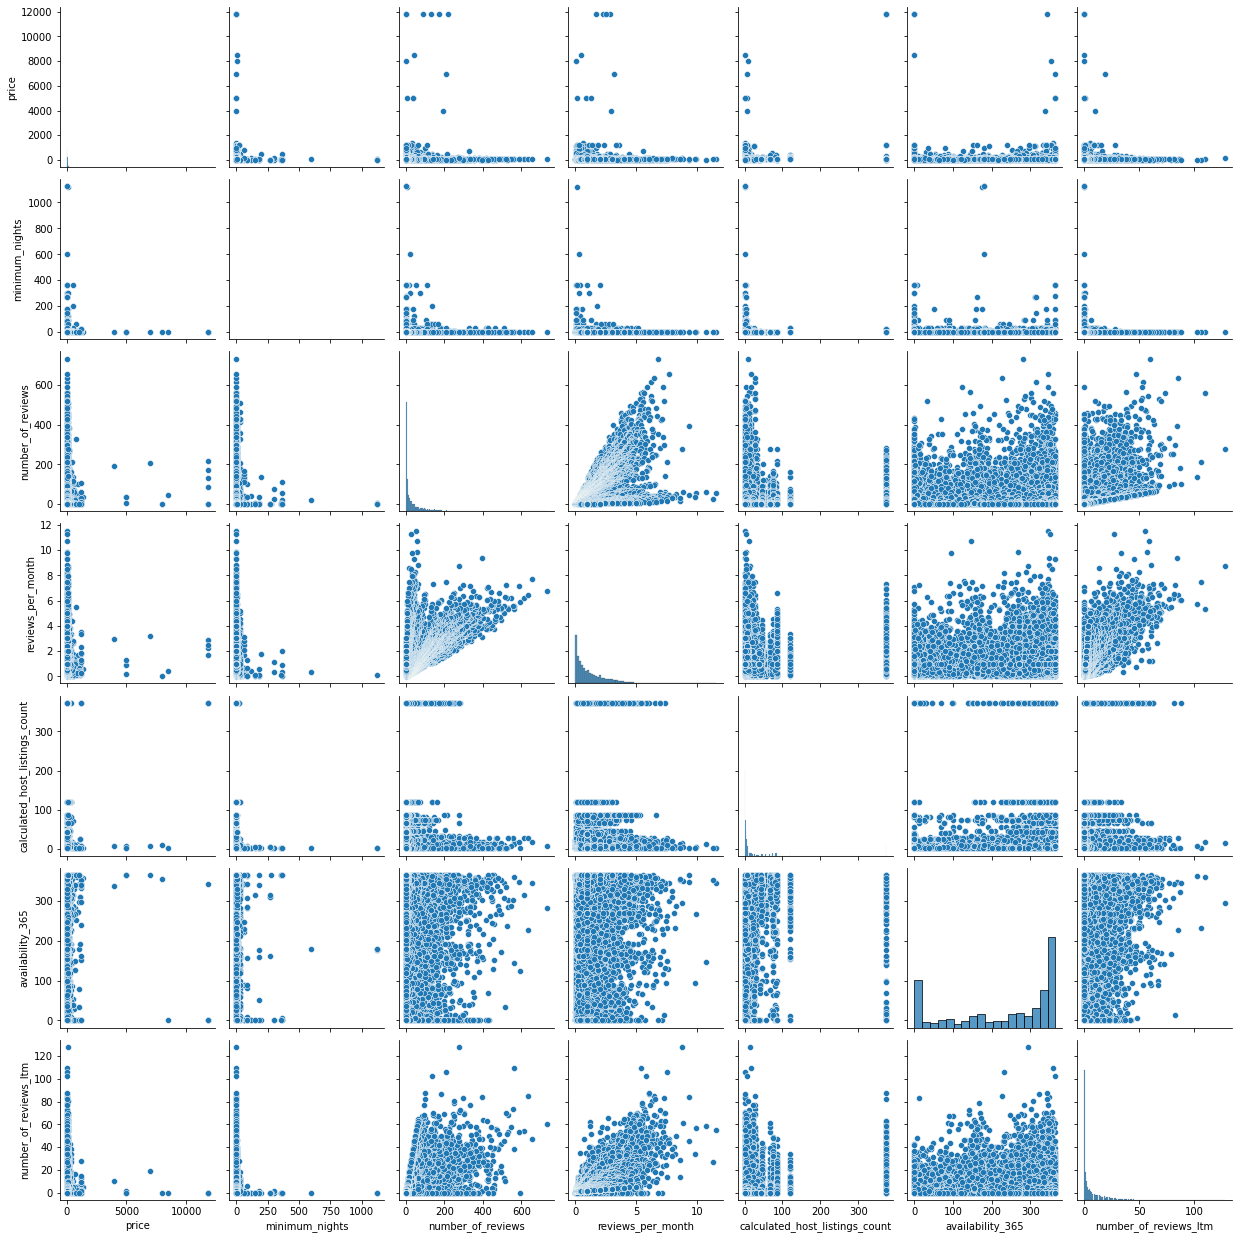

In [ ]:
#plotar relação de distribuição entre as variáveis
plt.figure(figsize=(20,20));
sns.pairplot(raw[numdata.drop(['latitude','longitude'])]);

Observa-se que não há realmente uma relação entre a quantidade de comentários com a quantidade de hospedagens que um único anfitrião possui, o que era de se esperar, já que normalmente não são uma relação de causa e efeito.

## Conclusões
